### Gathering Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import os

#### Twitter Archive File

In [2]:
# Read the twitter archive csv file
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Import the image predictions tsv file from a URL
# Response 200 means that the get request was successful
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Ensuring that the tsv file has been downloaded
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep = '\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Did not get access to Tweepy, so the data was extracted directly from the txt file
tweets = pd.read_json('tweet_json.txt', lines=True)
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
# Reference : https://knowledge.udacity.com/questions/14030
# Save the required columns to a dataframe
tweets_list = []
with open ('tweet_json.txt', encoding='utf-8') as json_file: 
    for tweet in json_file: 
        line= json_file.readline()
        all_tweets= json.loads(line)
        tweet_id= all_tweets['id']
        favorite_count= all_tweets['favorite_count']
        retweet_count= all_tweets['retweet_count']
        tweets_list.append({'tweet_id':str(tweet_id), 
                            'favorite_count': int(favorite_count), 
                           'retweet_count': int(retweet_count)})
                          
        tweets_counts= pd.DataFrame(tweets_list, columns= ['tweet_id', 'favorite_count', 'retweet_count'])
tweets_counts.head()

,tweet_id,favorite_count,retweet_count
0,892177421306343426,33819,6514
1,891689557279858688,42908,8964
2,891087950875897856,20562,3261
3,890729181411237888,56848,16716
4,890240255349198849,32467,7711


### Assessing Data

In [8]:
predictions[predictions.jpg_url.duplicated()].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [9]:
# Using the info function, it is clear that there's a lot of data missing from some of the columns
# Timestamps columns' data type should be datetime
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# minimum value of the rating denominator is zero which is not logical
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Only row that has a rating denominator of zero
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# No contributors and coordinates
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [13]:
archive['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
Toby              7
Bailey            7
Buddy             7
an                7
Milo              6
Rusty             6
Bella             6
Jack              6
Dave              6
Stanley           6
Scout             6
Leo               6
Koda              6
Oscar             6
Jax               6
very              5
               ... 
Ralphson          1
Eriq              1
Milky             1
Coleman           1
Huxley            1
Chuq              1
Cleopatricia      1
Beckham           1
Tanner            1
Grey              1
Pilot             1
Bowie             1
Tycho             1
Bilbo             1
Sailor            1
Zooey             1
Dunkin            1
Murphy            1
Hector            1


In [14]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
#### Twitter archive
- Timestamp column's data type is object instead of datetime
- Some entries where the rating denominator is 0 which is not logical, or values other than 10
- Some columns are not needed for this analysis
- Remove rows that has invalid values in the name column (Such as a, an, and by)
- Tweets which have no name are represented as None instead of Nulls
- Convert tweet_id data type to string
- All None values in the last four columns which represent dog stage should be space ' '

#### Image predictions
- Image prediction columns need to have a proper naming
- Some columns are not needed for this analysis
- Convert tweet_id data type to string



### Tidiness issues
- Archive's data frame should have one column identifying the dog's stage instead of four (dogo, floofer, pupper, puppo)
- All three datasets can be merged to form one table


## Cleaning Data

In [15]:
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweets_counts_clean = tweets_counts.copy()

##### Define
Remove columns related to retweets using the `.drop` method

##### Code

In [16]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source', 'text', 'expanded_urls'], axis=1, inplace = True)

##### Test

In [17]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


##### Define
Remove entries where the denominator does not equal 10 using the `.drop` method

##### Clean

In [18]:
archive_clean.drop(archive_clean[archive_clean.rating_denominator != 10].index, inplace = True)

##### Test

In [19]:
archive_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

##### Define
Convert the tweet's archive's data type from object to datetime using `.to_datetime` method

##### Code

In [20]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

##### Test

In [21]:
archive_clean.timestamp.dtypes

datetime64[ns, UTC]

##### Define
Convert all names that are None to NaN using `.replace` and `np.nan` functions

##### Code

In [22]:
# Number of non-null name before running the code is 2333
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2333 non-null int64
timestamp             2333 non-null datetime64[ns, UTC]
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  2333 non-null object
doggo                 2333 non-null object
floofer               2333 non-null object
pupper                2333 non-null object
puppo                 2333 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 182.3+ KB


In [23]:
archive_clean['name'].replace('None', np.nan, inplace=True)

##### Test

In [24]:
# Number of non-null name after running the code is 1605
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2333 non-null int64
timestamp             2333 non-null datetime64[ns, UTC]
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  1605 non-null object
doggo                 2333 non-null object
floofer               2333 non-null object
pupper                2333 non-null object
puppo                 2333 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 182.3+ KB


##### Define
Replace all the words that do not belong in the names column with NaN using `.replace` function

##### Code

In [25]:
# Source: https://github.com/thomasdmtang/Udacity-Data-Wrangling/blob/master/wrangle_act.ipynb
# used the .islower function to find all the words in the name column which don't belong there
archive_wrongnames = archive[archive.name.str.islower() == True]
archive_wrongnames.name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
getting          2
actually         2
mad              2
not              2
old              1
all              1
light            1
this             1
my               1
such             1
by               1
officially       1
unacceptable     1
infuriating      1
his              1
space            1
incredibly       1
life             1
Name: name, dtype: int64

In [26]:
wrongnames = list(archive_wrongnames.name.unique())

In [27]:
for word in wrongnames:
    archive_clean.drop(archive_clean[archive_clean.name == word].index, axis=0, inplace = True)

##### Test

In [28]:
# Number of rows after dropping the rows has been reduced to 2227
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2227 non-null int64
timestamp             2227 non-null datetime64[ns, UTC]
rating_numerator      2227 non-null int64
rating_denominator    2227 non-null int64
name                  1499 non-null object
doggo                 2227 non-null object
floofer               2227 non-null object
pupper                2227 non-null object
puppo                 2227 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 174.0+ KB


##### Define
convert the tweet_id data type in archives and predictions dataframes from integer to string using the `.astype` function

##### Code

In [29]:
archive_clean['tweet_id']= archive_clean['tweet_id'].astype(str) # str()
predictions_clean['tweet_id']= predictions_clean['tweet_id'].astype(str) # str()

##### Test

In [30]:
archive_clean.tweet_id.dtypes

dtype('O')

In [31]:
predictions_clean.tweet_id.dtypes

dtype('O')

##### Define
Replace all None values in doggo, floofer, pupper, and puppo columns with a space '  ' using the `.replace` function

##### Code

In [32]:
archive_clean['doggo'].replace('None', '', inplace=True)
archive_clean['floofer'].replace('None', '', inplace=True)
archive_clean['pupper'].replace('None', '', inplace=True)
archive_clean['puppo'].replace('None', '', inplace=True)

##### Test

In [33]:
# Tesing one of the columns to check
archive_clean.doggo.value_counts()

         2134
doggo      93
Name: doggo, dtype: int64

##### Define
Replace image predictions' columns with appropriate naming using the `.replace` function

##### Code

In [34]:
predictions_clean.rename(columns={'p1': 'prediction', 'p1_conf': 'prediction_confidence', 'p1_dog': 'prediction_is_a_dog',}, inplace=True)

##### Test

In [35]:
# Column names have been changed
predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction,prediction_confidence,prediction_is_a_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define
Remove unnecessary columns from the predtictions dataframe using the `.drop` function

##### Code

In [36]:
predictions_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'jpg_url', 'img_num'], axis=1, inplace = True)

##### Test

In [37]:
predictions_clean.head()

,tweet_id,prediction,prediction_confidence,prediction_is_a_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True


##### Define
Merge all four columns (doggo, floofer, pupper, and puppo) into one column named dog_stage

##### Code

In [38]:
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [39]:
archive_clean.loc[archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [40]:
archive_clean.loc[archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

In [41]:
archive_clean.loc[archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

In [42]:
archive_clean['dog_stage'].value_counts()

                  1863
pupper             233
doggo               81
puppo               29
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

##### Test

In [43]:
archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,,,,,


##### Define
Merge all three datasets into one dataframe using the `.merge` function

##### Code

In [44]:
merge_df = pd.merge(archive_clean, tweets_counts_clean, on='tweet_id', how='left')
archive_clean = pd.merge(merge_df, predictions_clean, on='tweet_id', how='left')

##### Test

In [45]:
archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,favorite_count,retweet_count,prediction,prediction_confidence,prediction_is_a_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,,,,,,NaN,NaN,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,,,,,,33819.0,6514.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,,,,,,NaN,NaN,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,,,,,,42908.0,8964.0,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,,,,,,NaN,NaN,basset,0.555712,True


##### Define
Drop the four dog stages columns and replace all spaces '' in the new dog_stage column with NaNs

##### Code

In [46]:
archive_clean['dog_stage'].replace('', np.nan, inplace=True)
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

##### Test

In [47]:
archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,prediction,prediction_confidence,prediction_is_a_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,NaN,NaN,NaN,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,NaN,33819.0,6514.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,NaN,NaN,NaN,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,NaN,42908.0,8964.0,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,NaN,NaN,NaN,basset,0.555712,True


##### Store Data

In [48]:
archive_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

##### Insight #1

In [49]:
# The correct predictions that the algorithms made for the first time show that the most occurring dog breed in the tweets is
# the golden retriever, and the second most occurring is the labrador retriever
archive_clean.prediction[archive_clean['prediction_is_a_dog'] == True].value_counts()

golden_retriever                  141
Labrador_retriever                 94
Pembroke                           85
Chihuahua                          81
pug                                54
chow                               41
Samoyed                            41
Pomeranian                         36
toy_poodle                         35
malamute                           29
cocker_spaniel                     29
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           22
Staffordshire_bullterrier          20
Cardigan                           19
beagle                             18
Siberian_husky                     18
German_shepherd                    18
Eskimo_dog                         18
Maltese_dog                        17
Rottweiler                         17
Shih-Tzu                           17
Lakeland_terrier                   17
Shetland_sheepdog                  16
Italian_greyhound                  15
kuvasz      

##### Insight #2

In [50]:
# The most retweeted dog stage is doggo followed by pupper
archive_clean.groupby('dog_stage').describe()['retweet_count']

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,45.0,8071.355556,14975.856858,39.0,2042.00,4011.0,5237.00,79515.0
"doggo, floofer",1.0,3433.000000,NaN,3433.0,3433.00,3433.0,3433.00,3433.0
"doggo, pupper",4.0,10124.750000,8663.910140,2173.0,2856.25,10352.5,17621.00,17621.0
"doggo, puppo",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,4.0,7658.750000,7263.753776,3265.0,3685.00,4436.5,8410.25,18497.0
pupper,122.0,3089.557377,5007.537738,26.0,671.75,1267.0,3324.00,32883.0
puppo,11.0,4051.363636,3739.327380,716.0,1481.50,1759.0,6226.50,11007.0


##### Insight #3 and Visualization

In [51]:
# Value counts function shows that the most occurring dog stage in the tweets was pupper, followed by doggo
archive_clean['dog_stage'].value_counts()

pupper            233
doggo              81
puppo              29
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

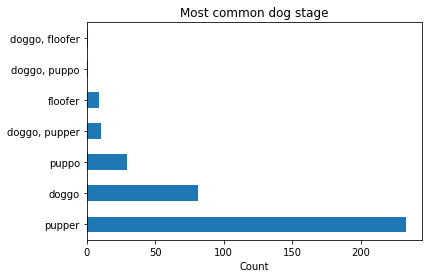

In [52]:
# Pupper is the most common dog stage in the tweets, followed by doggo which can be seen visually from the bar plot
archive_clean['dog_stage'].value_counts().plot.barh(title='Most common dog stage');
plt.xlabel('Count');